#### Abhi Abduh - SQL & Data Wrangling Project ©

To check my publications, visit my medium account: https://medium.com/@abhi.abduh

### First and foremost, Importing Essential Library

In [2]:
#Import library yang dibutuhkan
import sqlite3 
import pandas as pd
import seaborn as sns
import numpy as np

#import library visualization
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Running query 
def run_query(query):
    conn = sqlite3.connect("olist.db")
    return pd.read_sql(query, conn)

def show_tables():
    query = '''
          SELECT * 
          FROM sqlite_master 
          WHERE type IN ("table", "view");
          '''
    return run_query(query)

show_tables()

,type,name,tbl_name,rootpage,sql
0,table,olist_order_customer_dataset,olist_order_customer_dataset,2,"CREATE TABLE ""olist_order_customer_dataset"" (\..."
1,table,olist_order_dataset,olist_order_dataset,2644,"CREATE TABLE ""olist_order_dataset"" (\n""index"" ..."
2,table,olist_order_reviews_dataset,olist_order_reviews_dataset,7660,"CREATE TABLE ""olist_order_reviews_dataset"" (\n..."
3,table,olist_order_payments_dataset,olist_order_payments_dataset,11735,"CREATE TABLE ""olist_order_payments_dataset"" (\..."
4,table,olist_order_items_dataset,olist_order_items_dataset,13754,"CREATE TABLE ""olist_order_items_dataset"" (\n""i..."
5,table,olist_products_dataset,olist_products_dataset,18289,"CREATE TABLE ""olist_products_dataset"" (\n""inde..."
6,table,olist_sellers_dataset,olist_sellers_dataset,18983,"CREATE TABLE ""olist_sellers_dataset"" (\n""index..."
7,table,olist_geolocation_dataset,olist_geolocation_dataset,19040,"CREATE TABLE ""olist_geolocation_dataset"" (\n""i..."
8,table,product_category_name_translation,product_category_name_translation,33966,"CREATE TABLE ""product_category_name_translatio..."


### Connect each dataframes

I use redundant method as i haven't been exploring using loop method to use this, but it's simple if we already know what columns and tables we want to sync.

In [4]:
#Tabel Customer
olist_order_customer_dataset = '''
SELECT *
FROM olist_order_customer_dataset
'''
olist_order_customer_dataset = run_query(olist_order_customer_dataset)

In [5]:
#Tabel order
olist_order_items_dataset = '''

SELECT 
    order_id,
    seller_id,
    price,
    order_item_id,
    product_id
FROM
    olist_order_items_dataset

'''
olist_order_items_dataset = run_query(olist_order_items_dataset)

In [6]:
#table seller
olist_sellers_dataset = '''

SELECT 
    seller_id,
    seller_zip_code_prefix,
    seller_city,
    seller_state
FROM
    olist_sellers_dataset

'''
olist_sellers_dataset = run_query(olist_sellers_dataset)

In [7]:
#tabel order 

olist_order_dataset = '''

SELECT 
    order_id,
    customer_id,
    order_purchase_timestamp,
    order_approved_at,
    order_delivered_customer_date
FROM
    olist_order_dataset

'''
olist_order_dataset = run_query(olist_order_dataset)

In [8]:
#tabel product

olist_products_dataset = '''

SELECT 
    product_id,
    product_category_name
FROM
    olist_products_dataset

'''
olist_products_dataset = run_query(olist_products_dataset)

In [9]:
#tabel product category name translation

product_category_name_translation = '''

SELECT
    product_category_name,
    product_category_name_english
FROM
    product_category_name_translation

'''
product_category_name_translation = run_query(product_category_name_translation)

Once it done, we have to merge entire table into one data

### Merging each data frame 

In [10]:
#using pandas query

merged_df = pd.merge(olist_order_dataset,olist_order_customer_dataset, on='customer_id', how='outer')
merged_df = pd.merge(merged_df,olist_order_items_dataset, on='order_id', how='outer')
merged_df = pd.merge(merged_df, olist_sellers_dataset, on='seller_id', how='outer')
merged_df = pd.merge(merged_df, olist_products_dataset, on='product_id', how='outer')
merged_df = pd.merge(merged_df, product_category_name_translation, on='product_category_name', how='outer')


### Columns rearrangements

In [11]:
# Rearrange position of each columns

new_order = ['order_id',
 'order_item_id',
 'product_id',
 'product_category_name',
 'product_category_name_english',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_customer_date',
 'customer_id',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'seller_id',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state',
 'price'
]

# Using loc method to specify column order 
merged_df = merged_df.loc[:, new_order]

merged_df

,order_id,order_item_id,product_id,product_category_name,product_category_name_english,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_id,seller_zip_code_prefix,seller_city,seller_state,price
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,maua,SP,29.99
1,128e10d95713541c87cd1a2e48201934,1.0,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,a20e8105f23924cd00833fd87daa0831,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,maua,SP,29.99
2,0e7e841ddf8f8f2de2bad69267ecfbcf,1.0,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,26c7ac168e1433912a51b924fbd34d34,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,maua,SP,29.99
3,bfc39df4f36c3693ff3b63fcbea9e90a,1.0,87285b34884572647811a353c7ac498a,utilidades_domesticas,housewares,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,53904ddbea91e1e92b2b3f1d09a7af86,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,maua,SP,29.99
4,5f49f31e537f8f1a496454b48edbe34d,2.0,be03d93320192443b8fa24c0ca6ead98,utilidades_domesticas,housewares,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-28 20:12:20,a7260a6ccba78544ccfaf43f920b7240,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,maua,SP,46.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,4cbf1cc60a2d1704a70e11ee8be1510a,1.0,2365562e74dd46f5e99cdc696c504cea,la_cuisine,la_cuisine,2018-01-01 17:03:13,2018-01-01 17:11:48,2018-01-10 13:45:30,406c8e1382162dc6bef214e0c01fc297,9b8844d7cceb1277e6508cce966e4a09,6767,taboao da serra,SP,c731d18cea9bf687ffee82a241c25b11,89701.0,concordia,SC,112.00
113421,fbd9022ebf9271e1952ca884a972d1bd,1.0,2365562e74dd46f5e99cdc696c504cea,la_cuisine,la_cuisine,2017-07-22 17:55:13,2017-07-22 18:10:09,2017-07-27 19:03:29,3e46b833c6f5d7827700b8ef99db2e08,578035514ad8238fa724f24b4aabc1df,88705,tubarao,SC,c731d18cea9bf687ffee82a241c25b11,89701.0,concordia,SC,105.00
113422,30b0ea32347476f4b427daf62e09a5bb,1.0,b52e7c92200ed9874e77bc09b5ed4d40,la_cuisine,la_cuisine,2017-08-12 19:20:39,2017-08-12 19:30:17,2017-08-17 18:28:10,9d9cfbce48737214f23bf294daf3c6f7,6c861f46d09c560422f6ba6b33c017fe,9371,maua,SP,c731d18cea9bf687ffee82a241c25b11,89701.0,concordia,SC,174.00
113423,1ce0acf125f1bcd636276dd213363196,1.0,cc9e875c2df286dbed83efe01191162c,la_cuisine,la_cuisine,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-09 20:38:07,d11524bb77c28efad04e4467eac8a660,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,c731d18cea9bf687ffee82a241c25b11,89701.0,concordia,SC,129.00


In [12]:
#Mengetahui info data 
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   order_item_id                  112650 non-null  float64
 2   product_id                     112650 non-null  object 
 3   product_category_name          111047 non-null  object 
 4   product_category_name_english  111023 non-null  object 
 5   order_purchase_timestamp       113425 non-null  object 
 6   order_approved_at              113264 non-null  object 
 7   order_delivered_customer_date  110196 non-null  object 
 8   customer_id                    113425 non-null  object 
 9   customer_unique_id             113425 non-null  object 
 10  customer_zip_code_prefix       113425 non-null  int64  
 11  customer_city                  113425 non-null  object 
 12  customer_state                

### Begin Data Cleaning 

### Find missing value

In [13]:
def missing_value(data):
    total = data.isna().sum().sort_values(ascending = False)
    percentage = (data.isna().sum()*100/data.isna().count()).sort_values(ascending = False) 
    tabel = {
            "Missing Data": total, 
            "Percentage (%)": percentage
            }
    tabel = pd.DataFrame(tabel)
    return tabel

In [14]:
missing_value(merged_df)

,Missing Data,Percentage (%)
order_delivered_customer_date,3229,2.846815
product_category_name_english,2402,2.117699
product_category_name,2378,2.096540
price,775,0.683271
product_id,775,0.683271
seller_state,775,0.683271
seller_city,775,0.683271
order_item_id,775,0.683271
seller_zip_code_prefix,775,0.683271
seller_id,775,0.683271


okay let's drop the missing values

In [15]:
#making the drop permanent using inplace
merged_df.dropna(inplace=True)

#define fresh variable
df = merged_df

Check if the null has been away

In [16]:
missing_value(df)

,Missing Data,Percentage (%)
order_id,0,0.0
order_item_id,0,0.0
seller_state,0,0.0
seller_city,0,0.0
seller_zip_code_prefix,0,0.0
seller_id,0,0.0
customer_state,0,0.0
customer_city,0,0.0
customer_zip_code_prefix,0,0.0
customer_unique_id,0,0.0


### Remove Duplication

In [17]:
# check using dataFrame
df[df.duplicated(keep=False)]

,order_id,order_item_id,product_id,product_category_name,product_category_name_english,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_id,seller_zip_code_prefix,seller_city,seller_state,price


In [18]:
#making duplicates away
df.drop_duplicates(keep = "first", inplace = True)

In [19]:
#checking duplicate data
df.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
113420    False
113421    False
113422    False
113423    False
113424    False
Length: 108623, dtype: bool

Although there are no duplication, but it is okay to double check with this code

### Unifying Formats - Checking if there is inconsistent values

**Shortens Data**

In [20]:
#shortens data
df["order_id"] = pd.factorize(df["order_id"])[0]
df['order_id'] = df['order_id'].map(lambda x: f'order{x}')

df["product_id"] = pd.factorize(df["product_id"])[0]
df['product_id'] = df['product_id'].map(lambda x: f'product{x}')

df["customer_id"] = pd.factorize(df["customer_id"])[0]
df['customer_id'] = df['customer_id'].map(lambda x: f'customer{x}')

df["customer_unique_id"] = pd.factorize(df["customer_unique_id"])[0]
df['customer_unique_id'] = df['customer_unique_id'].map(lambda x: f'customer{x}')

df["seller_id"] = pd.factorize(df["seller_id"])[0]
df['seller_id'] = df['seller_id'].map(lambda x: f'seller{x}')

df

,order_id,order_item_id,product_id,product_category_name,product_category_name_english,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_id,seller_zip_code_prefix,seller_city,seller_state,price
0,order0,1.0,product0,utilidades_domesticas,housewares,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,customer0,customer0,3149,sao paulo,SP,seller0,9350.0,maua,SP,29.99
1,order1,1.0,product0,utilidades_domesticas,housewares,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,customer1,customer1,3366,sao paulo,SP,seller0,9350.0,maua,SP,29.99
2,order2,1.0,product0,utilidades_domesticas,housewares,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,customer2,customer2,2290,sao paulo,SP,seller0,9350.0,maua,SP,29.99
3,order3,1.0,product0,utilidades_domesticas,housewares,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,customer3,customer3,88032,florianopolis,SC,seller0,9350.0,maua,SP,29.99
4,order4,2.0,product1,utilidades_domesticas,housewares,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-28 20:12:20,customer4,customer4,1315,sao paulo,SP,seller0,9350.0,maua,SP,46.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,order95107,1.0,product31612,la_cuisine,la_cuisine,2018-01-01 17:03:13,2018-01-01 17:11:48,2018-01-10 13:45:30,customer95107,customer92061,6767,taboao da serra,SP,seller144,89701.0,concordia,SC,112.00
113421,order95108,1.0,product31612,la_cuisine,la_cuisine,2017-07-22 17:55:13,2017-07-22 18:10:09,2017-07-27 19:03:29,customer95108,customer53424,88705,tubarao,SC,seller144,89701.0,concordia,SC,105.00
113422,order95109,1.0,product31613,la_cuisine,la_cuisine,2017-08-12 19:20:39,2017-08-12 19:30:17,2017-08-17 18:28:10,customer95109,customer92062,9371,maua,SP,seller144,89701.0,concordia,SC,174.00
113423,order95110,1.0,product31614,la_cuisine,la_cuisine,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-09 20:38:07,customer95110,customer92063,30130,belo horizonte,MG,seller144,89701.0,concordia,SC,129.00


**Handling strings**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108623 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       108623 non-null  object 
 1   order_item_id                  108623 non-null  float64
 2   product_id                     108623 non-null  object 
 3   product_category_name          108623 non-null  object 
 4   product_category_name_english  108623 non-null  object 
 5   order_purchase_timestamp       108623 non-null  object 
 6   order_approved_at              108623 non-null  object 
 7   order_delivered_customer_date  108623 non-null  object 
 8   customer_id                    108623 non-null  object 
 9   customer_unique_id             108623 non-null  object 
 10  customer_zip_code_prefix       108623 non-null  int64  
 11  customer_city                  108623 non-null  object 
 12  customer_state                

In [22]:
df['customer_city'].unique()

array(['sao paulo', 'florianopolis', 'manaus', ..., 'pirpirituba',
       'salto grande', 'conceicao do almeida'], dtype=object)

In [23]:
df['order_id'].value_counts()

order40709    21
order56989    20
order44396    20
order28968    15
order75044    15
              ..
order33707     1
order33706     1
order33705     1
order33704     1
order95111     1
Name: order_id, Length: 95112, dtype: int64

In [24]:
# loop to make all the name being lowered
#but you gotta make sure the data in this list is str NOT int
def formatting(name_column):
    df[name_column] = df[name_column].str.lower()
    
name_column = ['order_id', 'product_id', 'product_category_name',
       'product_category_name_english', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_customer_date', 'customer_id',
       'customer_unique_id', 'customer_city',
       'customer_state', 'seller_id', 'seller_city',
       'seller_state']

for i in name_column:
    formatting(i)
    

**Formatting Date type**

In [25]:
def format_date(date_type):
    df[date_type] = pd.to_datetime(df[date_type])
    
list_time = ['order_purchase_timestamp',
             'order_delivered_customer_date',
             'order_approved_at']

for i in list_time:
    format_date(i)

Now the data has been change to date time!

**Formatting float into integer**

In [26]:
def format_int(int_data):
    df[int_data] = df[int_data].astype(int)
    
list_int = ['seller_zip_code_prefix', 
            'order_item_id']

for i in list_int:
    format_int(i)

**All good, No inconsistent value as for now!**

In [27]:
#you can check it now
df.head()

,order_id,order_item_id,product_id,product_category_name,product_category_name_english,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_id,seller_zip_code_prefix,seller_city,seller_state,price
0,order0,1,product0,utilidades_domesticas,housewares,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,customer0,customer0,3149,sao paulo,sp,seller0,9350,maua,sp,29.99
1,order1,1,product0,utilidades_domesticas,housewares,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,customer1,customer1,3366,sao paulo,sp,seller0,9350,maua,sp,29.99
2,order2,1,product0,utilidades_domesticas,housewares,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,customer2,customer2,2290,sao paulo,sp,seller0,9350,maua,sp,29.99
3,order3,1,product0,utilidades_domesticas,housewares,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,customer3,customer3,88032,florianopolis,sc,seller0,9350,maua,sp,29.99
4,order4,2,product1,utilidades_domesticas,housewares,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-28 20:12:20,customer4,customer4,1315,sao paulo,sp,seller0,9350,maua,sp,46.80


### Handling Outliers

In [28]:
df[df['price'] > 4000]

,order_id,order_item_id,product_id,product_category_name,product_category_name_english,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_id,seller_zip_code_prefix,seller_city,seller_state,price
6780,order5618,1,product2180,utilidades_domesticas,housewares,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-03-03 14:23:18,customer5618,customer5556,79042,campo grande,ms,seller384,3635,sao paulo,sp,6735.00
20036,order17493,1,product5741,esporte_lazer,sports_leisure,2018-07-29 08:39:48,2018-07-30 08:15:14,2018-07-31 23:03:28,customer17493,customer17209,34018,nova lima,mg,seller170,2030,sao paulo,sp,4059.00
76489,order66421,1,product21287,consoles_games,consoles_games,2018-03-29 10:31:29,2018-03-31 08:27:27,2018-04-06 22:35:30,customer66421,customer64831,35340,bom jesus do galho,mg,seller693,8260,sao paulo,sp,4099.99
104320,order87314,1,product28262,artes,art,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-06-05 17:09:48,customer87314,customer84658,17506,marilia,sp,seller2666,74210,goiania,go,6499.00
105703,order88447,1,product28783,instrumentos_musicais,musical_instruments,2018-08-03 21:10:16,2018-08-06 14:24:28,2018-08-08 22:51:57,customer88447,customer85736,2995,sao paulo,sp,seller1148,20060,rio de janeiro,rj,4399.87
108993,order91440,1,product30123,eletroportateis,small_appliances,2017-04-18 18:50:13,2017-04-19 15:50:15,2017-05-07 10:42:39,customer91440,customer88557,9341,maua,sp,seller2755,13480,limeira,sp,4690.00
108996,order91443,1,product30125,eletroportateis,small_appliances,2017-04-01 15:58:40,2017-04-03 13:25:18,2017-04-17 11:04:45,customer91443,customer88550,28970,araruama,rj,seller2755,13480,limeira,sp,4799.00
113018,order94797,1,product31481,pcs,computers,2018-06-22 12:23:19,2018-06-22 12:36:36,2018-07-06 01:08:30,customer94797,customer91771,58038,joao pessoa,pb,seller2167,46430,guanambi,ba,4590.00
113021,order94800,1,product31484,pcs,computers,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-15 14:57:50,customer94800,customer91774,29066,vitoria,es,seller2900,86026,londrina,pr,6729.00


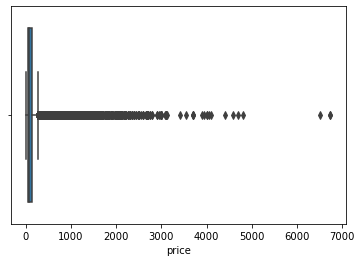

In [29]:
def box_plot(data, x):
  sns.boxplot(data=data,x=x)
  plt.show()

box_plot(df,'price')

Turns out we found out that price had outliers! Let's clean them up

Perform calculation using IQR (Inter Quartile Range)

In [30]:
# Function
def outliers(data, col_name, replace=False):
    Q1 = data[col_name].quantile(.25)
    Q3 = data[col_name].quantile(.75)
    IQR = Q3 - Q1

    lower_IQR = data[col_name] < Q1 - 1.5 * IQR
    upper_IQR = data[col_name] > Q3 + 1.5 * IQR

    if replace:
        new_outliers_value = data[col_name].median()
        data.loc[lower_IQR | upper_IQR, col_name] = new_outliers_value
        data[lower_IQR | upper_IQR][col_name].head()
    else:
        outliers = data[lower_IQR | upper_IQR]
        return outliers
    
hasil_outliers = outliers(df, "price")

print("Number of Outliers: ", hasil_outliers["price"].count())
print("Total of Datapoints: ", df["price"].count())
print("Outliers to Total Data Percentage: "\
      + f"{round((hasil_outliers['price'].count()/df['price'].count())*100, 3)}%")

Number of Outliers:  8044
Total of Datapoints:  108623
Outliers to Total Data Percentage: 7.405%


<AxesSubplot:xlabel='price'>

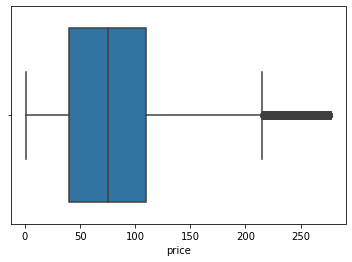

In [31]:
#drop the outliers
outliers(df, "price", replace = True)
#and show them
sns.boxplot(data=df,x='price')

No outliers anymore! 

## It's time to conduct a simple Exploratory Data Analysis

**The objective:**
* **a. The company wants to check the Sales volume Quarterly from 2016 to 2018 (YoY)**
* **b. The company wants to know which Sales channels most performed.**
* **c. The company wants to know the most purchased product category**


a. The company wants to check the Sales volume Quarterly from 2016 to 2018 (yearly)


In [32]:
import datetime as dt
from datetime import datetime

In [33]:
df["year"] = df["order_purchase_timestamp"].dt.year
df["month"] = df["order_purchase_timestamp"].dt.month
df["day"] = df["order_purchase_timestamp"].dt.day

df[['year','month','day']]

,year,month,day
0,2017,10,2
1,2017,8,15
2,2017,8,2
3,2017,10,23
4,2017,8,24
...,...,...,...
113420,2018,1,1
113421,2017,7,22
113422,2017,8,12
113423,2017,7,31


Checking unique inside the data

In [34]:
df['year'].unique()

array([2017, 2018, 2016])

In [45]:
df[df['year']== 2016].head(10)

,order_id,order_item_id,product_id,product_category_name,product_category_name_english,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,customer_id,customer_unique_id,...,customer_city,customer_state,seller_id,seller_zip_code_prefix,seller_city,seller_state,price,year,month,day
1191,order950,1,product254,utilidades_domesticas,housewares,2016-10-09 13:31:57,2016-10-10 03:15:41,2016-10-19 19:05:42,customer950,customer943,...,belo horizonte,mg,seller31,36500,uba,mg,44.99,2016,10,9
3600,order2995,1,product1013,utilidades_domesticas,housewares,2016-10-08 10:26:41,2016-10-08 11:02:40,2016-10-28 14:11:26,customer2995,customer2965,...,santa ines,ma,seller128,15502,votuporanga,sp,19.90,2016,10,8
3838,order3192,1,product1108,utilidades_domesticas,housewares,2016-10-10 07:53:34,2016-10-10 11:03:35,2016-10-17 12:03:38,customer3192,customer3160,...,rio de janeiro,rj,seller137,37580,monte siao,mg,32.99,2016,10,10
3991,order3306,1,product1150,utilidades_domesticas,housewares,2016-10-06 15:19:40,2016-10-07 10:11:30,2016-11-07 16:26:10,customer3306,customer3271,...,natal,rn,seller141,15075,sao jose do rio preto,sp,199.90,2016,10,6
3992,order3306,2,product1150,utilidades_domesticas,housewares,2016-10-06 15:19:40,2016-10-07 10:11:30,2016-11-07 16:26:10,customer3306,customer3271,...,natal,rn,seller141,15075,sao jose do rio preto,sp,199.90,2016,10,6
5893,order4903,1,product1795,utilidades_domesticas,housewares,2016-10-08 15:02:10,2016-10-08 19:55:50,2016-10-31 11:35:45,customer4903,customer4848,...,apuarema,ba,seller265,8290,sao paulo,sp,169.99,2016,10,8
6049,order5044,1,product1833,utilidades_domesticas,housewares,2016-10-04 15:44:44,2016-10-06 15:57:59,2016-11-17 08:38:57,customer5044,customer4987,...,sao paulo,sp,seller274,5424,sao paulo,sp,109.90,2016,10,4
6052,order5047,1,product1833,utilidades_domesticas,housewares,2016-10-07 11:20:34,2016-10-07 12:14:56,2016-10-14 12:14:57,customer5047,customer4990,...,sao paulo,sp,seller274,5424,sao paulo,sp,109.90,2016,10,7
6053,order5047,2,product1833,utilidades_domesticas,housewares,2016-10-07 11:20:34,2016-10-07 12:14:56,2016-10-14 12:14:57,customer5047,customer4990,...,sao paulo,sp,seller274,5424,sao paulo,sp,109.90,2016,10,7
6054,order5047,3,product1833,utilidades_domesticas,housewares,2016-10-07 11:20:34,2016-10-07 12:14:56,2016-10-14 12:14:57,customer5047,customer4990,...,sao paulo,sp,seller274,5424,sao paulo,sp,109.90,2016,10,7


In [36]:
year_2016 = df[df['year'] == 2016]
year_2016.describe()

,order_item_id,customer_zip_code_prefix,seller_zip_code_prefix,price,year,month,day
count,321.000000,321.000000,321.000000,321.000000,321.0,321.000000,321.000000
mean,1.274143,39818.168224,30260.414330,83.386760,2016.0,9.996885,6.654206
std,0.770299,30937.031971,29909.724433,58.599878,0.0,0.147869,2.387871
min,1.000000,1230.000000,1031.000000,6.000000,2016.0,9.000000,3.000000
25%,1.000000,13185.000000,8820.000000,43.890000,2016.0,10.000000,5.000000
50%,1.000000,29154.000000,17370.000000,72.000000,2016.0,10.000000,6.000000
75%,1.000000,68193.000000,36500.000000,99.990000,2016.0,10.000000,8.000000
max,6.000000,99950.000000,99500.000000,269.900000,2016.0,12.000000,23.000000


In [37]:
year_2017 = df[df['year'] == 2017]
year_2017.describe()

,order_item_id,customer_zip_code_prefix,seller_zip_code_prefix,price,year,month,day
count,48661.000000,48661.000000,48661.000000,48661.000000,48661.0,48661.000000,48661.000000
mean,1.195680,36360.652391,24800.668872,83.062802,2017.0,8.001295,16.135098
std,0.720733,29872.943701,27498.434198,56.839164,0.0,3.107582,8.776119
min,1.000000,1004.000000,1001.000000,1.200000,2017.0,1.000000,1.000000
25%,1.000000,12248.000000,7112.000000,39.900000,2017.0,6.000000,9.000000
50%,1.000000,26255.000000,14070.000000,72.900000,2017.0,8.000000,16.000000
75%,1.000000,60760.000000,30882.000000,109.900000,2017.0,11.000000,24.000000
max,21.000000,99980.000000,99700.000000,277.000000,2017.0,12.000000,31.000000


In [38]:
year_2018 = df[df['year'] == 2018]
year_2018.describe()

,order_item_id,customer_zip_code_prefix,seller_zip_code_prefix,price,year,month,day
count,59641.000000,59641.000000,59641.000000,59641.000000,59641.0,59641.000000,59641.000000
mean,1.200651,34131.798410,24277.218289,83.366020,2018.0,4.413290,15.148002
std,0.698156,29861.866129,27801.510315,55.910875,0.0,2.277753,8.545741
min,1.000000,1003.000000,1001.000000,0.850000,2018.0,1.000000,1.000000
25%,1.000000,9726.000000,5849.000000,39.900000,2018.0,2.000000,8.000000
50%,1.000000,22790.000000,13456.000000,74.900000,2018.0,4.000000,15.000000
75%,1.000000,57036.000000,25645.000000,111.900000,2018.0,6.000000,22.000000
max,20.000000,99980.000000,99730.000000,277.000000,2018.0,8.000000,31.000000


In [39]:
total = df.groupby(['year']).sum().sort_values("price", ascending = False).reset_index()
total

,year,order_item_id,customer_zip_code_prefix,seller_zip_code_prefix,price,month,day
0,2018,71608,2035654589,1447917576,4972032.81,263213,903442
1,2017,58183,1769345706,1206825348,4041919.02,389351,785150
2,2016,409,12781632,9713593,26767.15,3209,2136


Define variables for each year and quarter

In [40]:
# Filter data for 2016 to 2018
yearly = df[(df['order_purchase_timestamp'].dt.year >= 2016) & (df['order_purchase_timestamp'].dt.year <= 2018)]

# Calculate quarterly sales volumes
quarterly = yearly.groupby([yearly['order_purchase_timestamp'].dt.year.rename('year'), pd.PeriodIndex(yearly['order_purchase_timestamp'], freq='Q').rename('quarter')])['price'].sum().reset_index()

Make the visualization

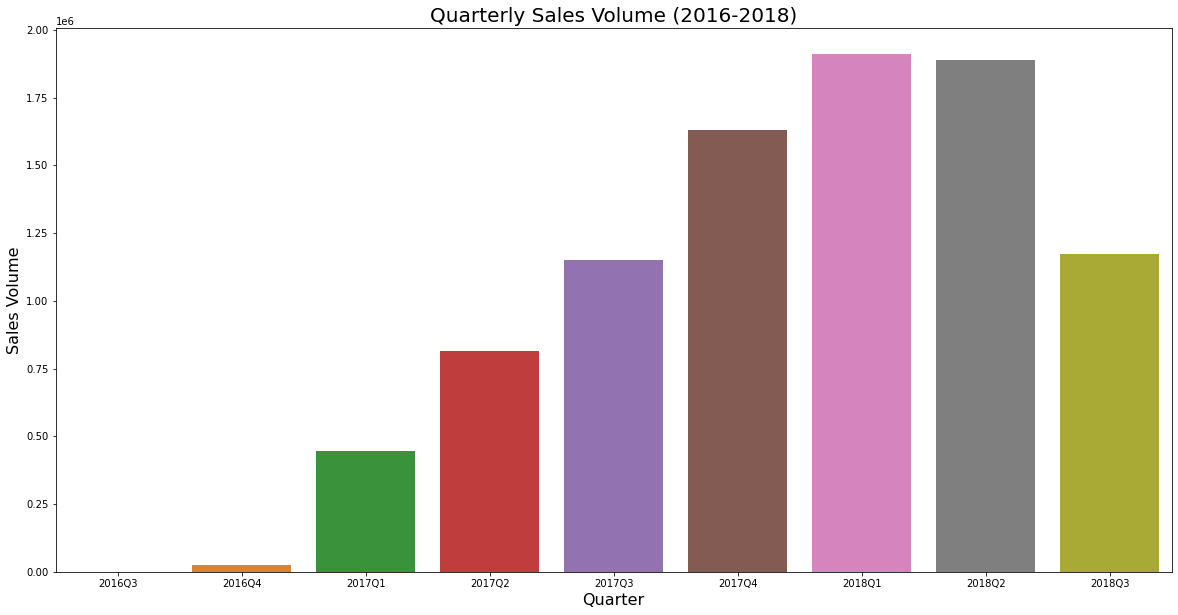

In [41]:
plt.figure(figsize=(20, 10))
sns.barplot(data=quarterly, x='quarter', y='price')
plt.title('Quarterly Sales Volume (2016-2018)', fontsize=20)
plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Sales Volume', fontsize=16)

plt.show()

**Answer**: As we can see there is a positive incline volume from 2016 Q4 to 2018 Q1 although in 2018 Q3 there was a significant drop, but we presume it was a cut-off date, meaning the data have not been fully generated by the admin. 

b. The company wants to know which Sales channels most performed.

In [42]:
# Group sales by channel and calculate total sales for each channel
sales_by_channel = df.groupby('seller_city')['price'].sum().reset_index()

# Sort sales by descending order to show the top performers
top_performers = sales_by_channel.sort_values('price', ascending=False).head()

# Print the top performing channels
top_performers

,seller_city,price
498,sao paulo,1901572.25
220,ibitinga,580341.90
155,curitiba,268301.73
250,itaquaquecetuba,222485.65
431,rio de janeiro,212653.06


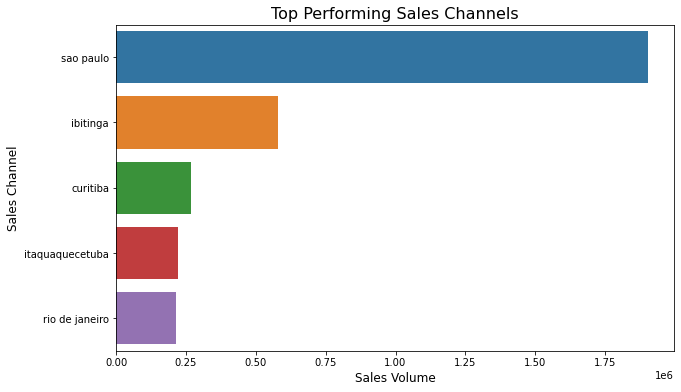

In [43]:
# Making visualization based on previous calculations

plt.figure(figsize=(10,6))
sns.barplot(x='price', y='seller_city', data=top_performers, orient='h')
plt.title('Top Performing Sales Channels', fontsize=16)
plt.xlabel('Sales Volume', fontsize=12)
plt.ylabel('Sales Channel', fontsize=12)
plt.show()

**Answer**: We identify that the most highest volume Sales Channels was from Sao Paulo city. Sao Paulo city is the busiest city of Brazil where the central business district, port, and other thriving industry was inplace, no wonder the demand very high compared to other cities like rio de janeiro. 

c. The company wants to know the most purchased product category


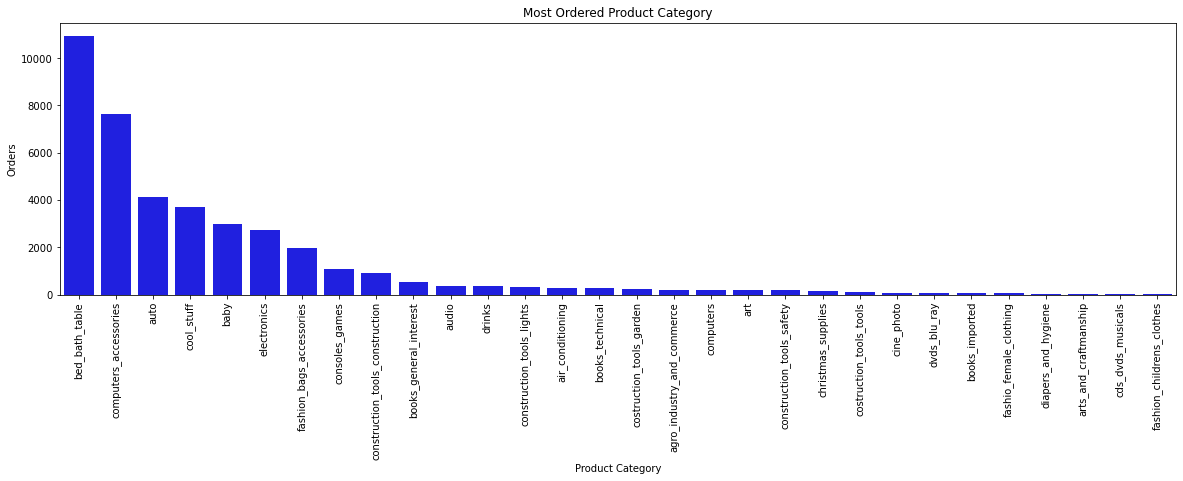

In [44]:
# Group the DataFrame by the product category
agg_product = df.groupby(['product_category_name_english']).count().head(30)

# Sort values using 'order_approved_at', we wanna check based on count of the order
agg_product = agg_product.sort_values(by='order_approved_at',ascending=False)

#Creating a vertical bar plot
plt.figure(figsize=(20,5))
sns.barplot(x=agg_product.index, y='order_approved_at', data=agg_product, color='blue')
plt.title('Most Ordered Product Category')
plt.xlabel('Product Category')
plt.ylabel('Orders')
plt.xticks(rotation=90)
plt.show()

**Answer**: Top product category is bed_bath_table compared to other categories, following computer accessories, automobile, cool_stuff (frozen food), baby, and electronics.

#### Abhi Abduh - SQL & Data Wrangling Project ©

*There are plenty of room to explore the datasets and creating visualization using seaborn and matplotlib. The code aboves were created to help a simple and consice guidance on how to process and distribute the data before we calculate anything from it. It is mandatory to handles all outliers and null datapoints in order to avoid miss interpretation and increase the accuracy as possible.*